In [1]:
import pandas as pd
import numpy as np
import os
import csv
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
# Get current size of plots
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: 
print("Current size:", fig_size)

Current size: [6.0, 4.0]


In [3]:
# Set figure width to 12 and height to 9
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

In [4]:
austin_df = pd.read_csv('austin_311_service_requests.csv',low_memory=False)
austin_df.head()

,city,close_date,complaint_description,complaint_type,council_district_code,county,created_date,incident_address,incident_zip,last_update_date,...,map_tile,owning_department,source,state_plane_x_coordinate,state_plane_y_coordinate,status,status_change_date,street_name,street_number,unique_key
0,AUSTIN,2015-01-20 10:41:48,Loose Dog,ACLONAG,3.0,TRAVIS,2015-01-20 10:41:48,1305 CORIANDER DR AUSTIN TX,78741.0,2015-01-27 12:51:06,...,ML18,Animal Services Office,Phone,3131141.68710771,1.005532e+07,Duplicate (closed),2015-01-20 10:41:48,CORIANDER,1305.0,15-00012439
1,AUSTIN,2016-06-01 10:58:13,Loose Dog,ACLONAG,7.0,TRAVIS,2016-05-22 10:00:49,3104 STONEWAY DR AUSTIN TX 78757,78757.0,2016-06-01 09:58:30,...,MJ29,Animal Services Office,Phone,3112134.24930453,1.010083e+07,Closed,2016-06-01 10:58:13,STONEWAY,3104.0,16-00123310
2,AUSTIN,2014-01-06 19:30:00,Loose Animal (not dog),ACLOANIM,2.0,TRAVIS,2014-01-06 18:04:00,4100 SMITH SCHOOL RD AUSTIN TX,78744.0,2014-01-06 18:32:00,...,MK16,Animal Services Office,Phone,3124825.4024878,1.004597e+07,Closed,2014-01-06 19:30:00,SMITH SCHOOL,4100.0,14-00003554
3,AUSTIN,2014-11-19 10:46:48,Austin Code - Request Code Officer,CODECOMP,7.0,TRAVIS,2014-11-15 15:43:41,12710 PALFREY DR AUSTIN TX 78727,78727.0,2014-11-19 10:46:48,...,ML35,Austin Code Department,Web,3124206.25,1.012812e+07,Closed,2014-11-19 10:46:48,PALFREY,12710.0,14-00247505
4,AUSTIN,2014-08-25 21:21:00,Animal - Proper Care,ACPROPER,1.0,TRAVIS,2014-07-28 17:33:00,6703 TULANE DR AUSTIN TX,78723.0,2014-08-25 20:23:00,...,MM26,Animal Services Office,Phone,3137129.998,1.008721e+07,Closed,2014-08-25 21:21:00,TULANE,6703.0,14-00156342


In [5]:
austin_df = austin_df[["city", "county", "incident_zip", "created_date", "owning_department", "complaint_description", "complaint_type"]]
austin_df.head()

,city,county,incident_zip,created_date,owning_department,complaint_description,complaint_type
0,AUSTIN,TRAVIS,78741.0,2015-01-20 10:41:48,Animal Services Office,Loose Dog,ACLONAG
1,AUSTIN,TRAVIS,78757.0,2016-05-22 10:00:49,Animal Services Office,Loose Dog,ACLONAG
2,AUSTIN,TRAVIS,78744.0,2014-01-06 18:04:00,Animal Services Office,Loose Animal (not dog),ACLOANIM
3,AUSTIN,TRAVIS,78727.0,2014-11-15 15:43:41,Austin Code Department,Austin Code - Request Code Officer,CODECOMP
4,AUSTIN,TRAVIS,78723.0,2014-07-28 17:33:00,Animal Services Office,Animal - Proper Care,ACPROPER


In [6]:
# austin_df = austin_df.rename(columns={"city":"City", "county":"County","incident_zip":"Incident Zip",
#                                       "created_date":"Date", "owning_department":"Department",
#                                       "complaint_description":"Complaint Description","complaint_type":"Type of Complaint"})
# austin_df.head(10)

In [7]:
austin_df.count()

city                     454982
county                   452747
incident_zip             454963
created_date             452741
owning_department        459305
complaint_description    459305
complaint_type           459305
dtype: int64

In [8]:
austin_df.replace('', np.nan, inplace=True)
austin_df.head()

,city,county,incident_zip,created_date,owning_department,complaint_description,complaint_type
0,AUSTIN,TRAVIS,78741.0,2015-01-20 10:41:48,Animal Services Office,Loose Dog,ACLONAG
1,AUSTIN,TRAVIS,78757.0,2016-05-22 10:00:49,Animal Services Office,Loose Dog,ACLONAG
2,AUSTIN,TRAVIS,78744.0,2014-01-06 18:04:00,Animal Services Office,Loose Animal (not dog),ACLOANIM
3,AUSTIN,TRAVIS,78727.0,2014-11-15 15:43:41,Austin Code Department,Austin Code - Request Code Officer,CODECOMP
4,AUSTIN,TRAVIS,78723.0,2014-07-28 17:33:00,Animal Services Office,Animal - Proper Care,ACPROPER


In [9]:
austin_df.count()

city                     454982
county                   452747
incident_zip             454963
created_date             452741
owning_department        459305
complaint_description    459305
complaint_type           459305
dtype: int64

In [10]:
cleanaustin_df = austin_df.dropna(how="any")
cleanaustin_df.count()

city                     445845
county                   445845
incident_zip             445845
created_date             445845
owning_department        445845
complaint_description    445845
complaint_type           445845
dtype: int64

In [11]:
cleanaustin_df.head(20)

,city,county,incident_zip,created_date,owning_department,complaint_description,complaint_type
0,AUSTIN,TRAVIS,78741.0,2015-01-20 10:41:48,Animal Services Office,Loose Dog,ACLONAG
1,AUSTIN,TRAVIS,78757.0,2016-05-22 10:00:49,Animal Services Office,Loose Dog,ACLONAG
2,AUSTIN,TRAVIS,78744.0,2014-01-06 18:04:00,Animal Services Office,Loose Animal (not dog),ACLOANIM
3,AUSTIN,TRAVIS,78727.0,2014-11-15 15:43:41,Austin Code Department,Austin Code - Request Code Officer,CODECOMP
4,AUSTIN,TRAVIS,78723.0,2014-07-28 17:33:00,Animal Services Office,Animal - Proper Care,ACPROPER
5,AUSTIN,TRAVIS,78702.0,2016-06-20 16:44:00,Animal Services Office,Animal - Proper Care,ACPROPER
6,AUSTIN,TRAVIS,78744.0,2015-08-25 11:03:04,Austin Code Department,Austin Code - Request Code Officer,CODECOMP
7,AUSTIN,TRAVIS,78749.0,2014-08-26 13:01:00,Austin Water Utility,Water Waste Report,WWREPORT
8,AUSTIN,TRAVIS,78702.0,2015-06-19 16:31:06,Parks & Recreation Department,Park Maintenance - Pool Issues,PRMTPOOL
9,AUSTIN,TRAVIS,78759.0,2017-08-01 12:55:03,Austin Code Department,Austin Code - Request Code Officer,CODECOMP


In [12]:
# cleanaustin_df['City'].value_counts()

In [13]:
value_list = ['AUSTIN', 'Austin', 'austin']
austincity_df = cleanaustin_df[cleanaustin_df.city.isin(value_list)]

In [14]:
austincity_df['city'].value_counts()

AUSTIN    434876
Austin       538
austin       498
Name: city, dtype: int64

In [15]:
value_list = ['TRAVIS']
austin311_df = austincity_df[austincity_df.county.isin(value_list)]

In [16]:
austin311_df.count()

city                     422852
county                   422852
incident_zip             422852
created_date             422852
owning_department        422852
complaint_description    422852
complaint_type           422852
dtype: int64

In [17]:
austin311_df["incident_zip"] = austin311_df["incident_zip"].astype(int)

C:\Users\Administrator\AppData\Local\conda\conda\envs\py36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [18]:
austin311_df.head()

,city,county,incident_zip,created_date,owning_department,complaint_description,complaint_type
0,AUSTIN,TRAVIS,78741,2015-01-20 10:41:48,Animal Services Office,Loose Dog,ACLONAG
1,AUSTIN,TRAVIS,78757,2016-05-22 10:00:49,Animal Services Office,Loose Dog,ACLONAG
2,AUSTIN,TRAVIS,78744,2014-01-06 18:04:00,Animal Services Office,Loose Animal (not dog),ACLOANIM
3,AUSTIN,TRAVIS,78727,2014-11-15 15:43:41,Austin Code Department,Austin Code - Request Code Officer,CODECOMP
4,AUSTIN,TRAVIS,78723,2014-07-28 17:33:00,Animal Services Office,Animal - Proper Care,ACPROPER


In [19]:
#Drop the City and County
austin311_df.drop('city',axis=1, inplace=True)
austin311_df.drop('county',axis=1, inplace=True)

#Change the date to a datetime format.
austin311_df['created_date'] = pd.to_datetime(austin311_df['created_date'], format='%Y/%m/%d')

#Create columns for year and month. 
austin311_df['year'] = austin311_df['created_date'].dt.year
austin311_df['month'] = austin311_df['created_date'].dt.month
#austin311_df['Month'] = austin311_df['Date'].dt.strftime("%B") for adding the text for month.
austin311_df.head()

C:\Users\Administrator\AppData\Local\conda\conda\envs\py36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Administrator\AppData\Local\conda\conda\envs\py36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Administrator\AppData\Local\conda\conda\envs\py36\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

,incident_zip,created_date,owning_department,complaint_description,complaint_type,year,month
0,78741,2015-01-20 10:41:48,Animal Services Office,Loose Dog,ACLONAG,2015,1
1,78757,2016-05-22 10:00:49,Animal Services Office,Loose Dog,ACLONAG,2016,5
2,78744,2014-01-06 18:04:00,Animal Services Office,Loose Animal (not dog),ACLOANIM,2014,1
3,78727,2014-11-15 15:43:41,Austin Code Department,Austin Code - Request Code Officer,CODECOMP,2014,11
4,78723,2014-07-28 17:33:00,Animal Services Office,Animal - Proper Care,ACPROPER,2014,7


In [20]:
austin311_df.head()

,incident_zip,created_date,owning_department,complaint_description,complaint_type,year,month
0,78741,2015-01-20 10:41:48,Animal Services Office,Loose Dog,ACLONAG,2015,1
1,78757,2016-05-22 10:00:49,Animal Services Office,Loose Dog,ACLONAG,2016,5
2,78744,2014-01-06 18:04:00,Animal Services Office,Loose Animal (not dog),ACLOANIM,2014,1
3,78727,2014-11-15 15:43:41,Austin Code Department,Austin Code - Request Code Officer,CODECOMP,2014,11
4,78723,2014-07-28 17:33:00,Animal Services Office,Animal - Proper Care,ACPROPER,2014,7


In [21]:
austin311_df['owning_department'].value_counts()

Animal Services Office                          83959
Austin Code Department                          77176
Transportation                                  73168
Austin Resource Recovery                        62244
Public Works                                    42411
Austin Energy Department                        17450
Parks & Recreation Department                   16114
Health & Human Services                         13759
Economic Development Department                 12078
Austin Water Utility                            10619
Watershed Protection                             9021
Public Health                                    3838
Austin Water                                      781
Neighborhood Housing & Community Development      120
Austin Fire Department                             63
Neighborhood Housing & Community                   50
Office of Emergency Management                      1
Name: owning_department, dtype: int64

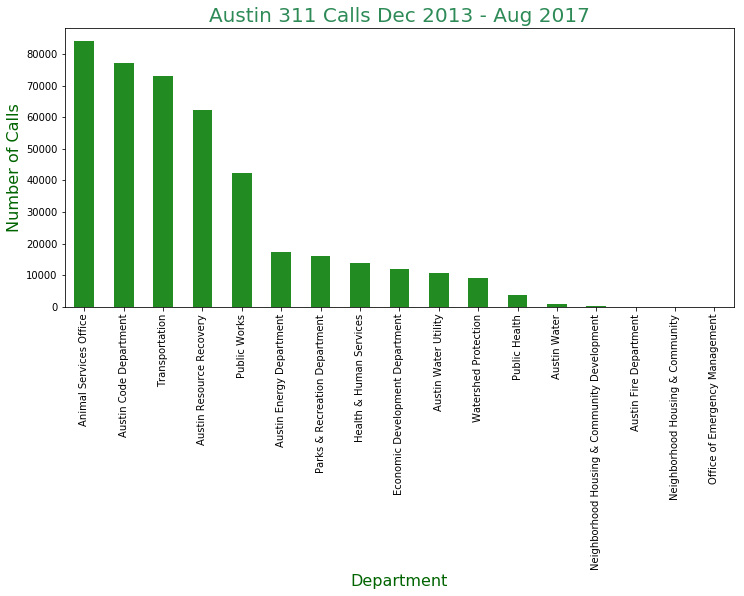

In [63]:
pd.value_counts(austin311_df['owning_department']).plot.bar(color = "forestgreen")
# plt.tight_layout()
plt.gcf().subplots_adjust(bottom=0.45)
plt.title('Austin 311 Calls Dec 2013 - Aug 2017', fontsize=20, color = "seagreen")
plt.xlabel('Department', fontsize=16, color = "darkgreen")
plt.ylabel('Number of Calls', fontsize=16, color = "darkgreen")
plt.savefig("overviewbydepartment.png")
plt.show()

In [23]:
# most common types of issues (count over 30000)
top_complaints = austin311_df.owning_department.value_counts().reset_index(name="count").query("count > 30000")["index"]
print(top_complaints)

0      Animal Services Office
1      Austin Code Department
2              Transportation
3    Austin Resource Recovery
4                Public Works
Name: index, dtype: object


In [24]:
#animal services information
animal_services = austin311_df[austin311_df['owning_department'].str.contains('Animal Services Office')]
animal_services.head()

,incident_zip,created_date,owning_department,complaint_description,complaint_type,year,month
0,78741,2015-01-20 10:41:48,Animal Services Office,Loose Dog,ACLONAG,2015,1
1,78757,2016-05-22 10:00:49,Animal Services Office,Loose Dog,ACLONAG,2016,5
2,78744,2014-01-06 18:04:00,Animal Services Office,Loose Animal (not dog),ACLOANIM,2014,1
4,78723,2014-07-28 17:33:00,Animal Services Office,Animal - Proper Care,ACPROPER,2014,7
5,78702,2016-06-20 16:44:00,Animal Services Office,Animal - Proper Care,ACPROPER,2016,6


In [25]:
animal_services['complaint_description'].value_counts()

Loose Dog                              27352
Animal Control - Assistance Request    17857
Injured / Sick Animal                  13371
Animal - Proper Care                    4959
Wildlife Exposure                       4601
Animal Bite                             4048
Found Animal - Pick Up                  2811
Found Animal Report - Keep              2628
Dangerous/Vicious Dog Investigation     1674
Loose Animal Not Dog                    1344
Bat Complaint                            963
Coyote Complaints                        749
Animal In Vehicle                        744
Animal Trapped in Storm Drain            371
Loose Animal (not dog)                   336
Animal Roadside Sales                     77
Dangerous Animal - Except Dogs            69
zCoyote Complaints                         3
Dead Bird                                  1
zz - Coyote Compliants                     1
Name: complaint_description, dtype: int64

In [26]:
#further cleaning  - duplicate columns due to input error
animal_services['complaint_description'] = animal_services['complaint_description'].str.replace("z", "")
animal_services['complaint_description'] = animal_services['complaint_description'].str.replace("zz - Coyote Compliants", "Coyote Complaints")

C:\Users\Administrator\AppData\Local\conda\conda\envs\py36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Administrator\AppData\Local\conda\conda\envs\py36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [27]:
#animal services complaint by zip code
#animal_services['incident_zip'].value_counts()

In [28]:
#top zip codes with the most animal services complaints (> 3000)
animal_services.incident_zip.value_counts().reset_index(name="count").query("count > 3000")["index"]

0    78744
1    78745
2    78741
3    78753
4    78758
5    78704
6    78702
7    78723
8    78748
9    78724
Name: index, dtype: int64

In [29]:
# most common types of animal complaints (count over 3000)
topanimal_complaints = animal_services.complaint_description.value_counts().reset_index(name="count").query("count > 3000")["index"]
print(topanimal_complaints)

0                              Loose Dog
1    Animal Control - Assistance Request
2                  Injured / Sick Animal
3                   Animal - Proper Care
4                      Wildlife Exposure
5                            Animal Bite
Name: index, dtype: object


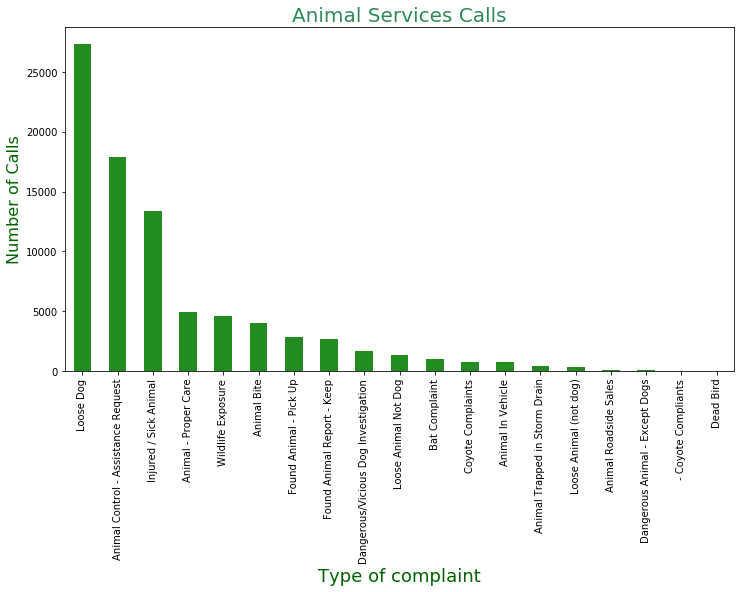

In [50]:
pd.value_counts(animal_services['complaint_description']).plot.bar(color = "forestgreen")
# plt.tight_layout()
plt.gcf().subplots_adjust(bottom=0.35)
plt.title('Animal Services Calls', fontsize=20, color = "seagreen")
plt.xlabel('Type of complaint', fontsize=18, color = "darkgreen")
plt.ylabel('Number of Calls', fontsize=16, color = "darkgreen")
plt.savefig("overviewanimalservices.png")
plt.show()

In [31]:
#code department info
code_department = austin311_df[austin311_df['owning_department'].str.contains('Austin Code Department')]
code_department.head()

,incident_zip,created_date,owning_department,complaint_description,complaint_type,year,month
3,78727,2014-11-15 15:43:41,Austin Code Department,Austin Code - Request Code Officer,CODECOMP,2014,11
6,78744,2015-08-25 11:03:04,Austin Code Department,Austin Code - Request Code Officer,CODECOMP,2015,8
9,78759,2017-08-01 12:55:03,Austin Code Department,Austin Code - Request Code Officer,CODECOMP,2017,8
13,78701,2016-08-17 11:46:27,Austin Code Department,Austin Code - Request Code Officer,CODECOMP,2016,8
18,78705,2016-09-15 13:52:56,Austin Code Department,Austin Code - Request Code Officer,CODECOMP,2016,9


In [32]:
#further cleaning  - duplicate columns due to input error
code_department['complaint_description'] = code_department['complaint_description'].str.replace("Austin Code - ", "")
code_department['complaint_description'] = code_department['complaint_description'].str.replace("Code Compliance - ", "")

C:\Users\Administrator\AppData\Local\conda\conda\envs\py36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Administrator\AppData\Local\conda\conda\envs\py36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [33]:
#top zip codes with the most code department complaints (> 3000)
code_department.incident_zip.value_counts().reset_index(name="count").query("count > 3000")["index"]

0    78745
1    78723
2    78758
3    78753
4    78702
5    78704
6    78741
7    78744
Name: index, dtype: int64

In [34]:
# most common types of code complaints (count over 100)
topcode_complaints = code_department.complaint_description.value_counts().reset_index(name="count").query("count > 100")["index"]
print(topcode_complaints)

0                   Request Code Officer
1                       Signs/Billboards
2         Short Term Rental Complaint SR
3    Short Term Rental (STR) Appointment
4              Construction Ordinance SR
Name: index, dtype: object


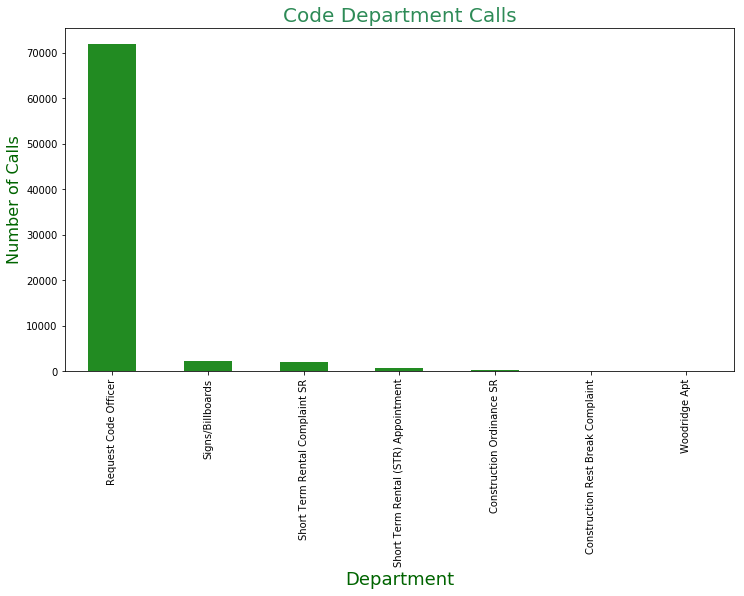

In [65]:
pd.value_counts(code_department['complaint_description']).plot.bar(color = "forestgreen")
# plt.tight_layout()
plt.gcf().subplots_adjust(bottom=0.35)
plt.title('Code Department Calls', fontsize=20, color = "seagreen")
plt.xlabel('Department', fontsize=18, color = "darkgreen")
plt.ylabel('Number of Calls', fontsize=16, color = "darkgreen")
plt.savefig("overviewcodedepartment.png")
plt.show()

In [36]:
#transportation department information
transportation = austin311_df[austin311_df['owning_department'].str.contains('Transportation')]
transportation.head()

,incident_zip,created_date,owning_department,complaint_description,complaint_type,year,month
14,78702,2014-05-15 10:13:41,Transportation,Sign - Traffic Sign Emergency,SIGNTRAF,2014,5
22,78742,2014-12-26 10:43:49,Transportation,Traffic Signal - Maintenance,TRASIGMA,2014,12
30,78701,2016-03-15 18:08:07,Transportation,Traffic Signal - Maintenance,TRASIGMA,2016,3
33,78703,2016-07-17 19:04:00,Transportation,Traffic Signal - Maintenance,TRASIGMA,2016,7
40,78751,2014-12-10 13:09:40,Transportation,Traffic Signal - Dig Tess Request,TRAFFI10,2014,12


In [37]:
#top zip codes with the most transportation complaints (> 3000)
transportation.incident_zip.value_counts().reset_index(name="count").query("count > 3000")["index"]

0    78701
1    78704
2    78745
3    78702
4    78758
5    78703
6    78723
Name: index, dtype: int64

In [38]:
# most common types of transportation complaints (count over 3000)
toptrans_complaints = transportation.complaint_description.value_counts().reset_index(name="count").query("count > 3000")["index"]
print(toptrans_complaints)

0         Traffic Signal - Maintenance
1    Traffic Signal - Dig Tess Request
2                           Sign - New
3      Sign - Traffic Sign Maintenance
4        Sign - Traffic Sign Emergency
5                Parking Machine Issue
Name: index, dtype: object


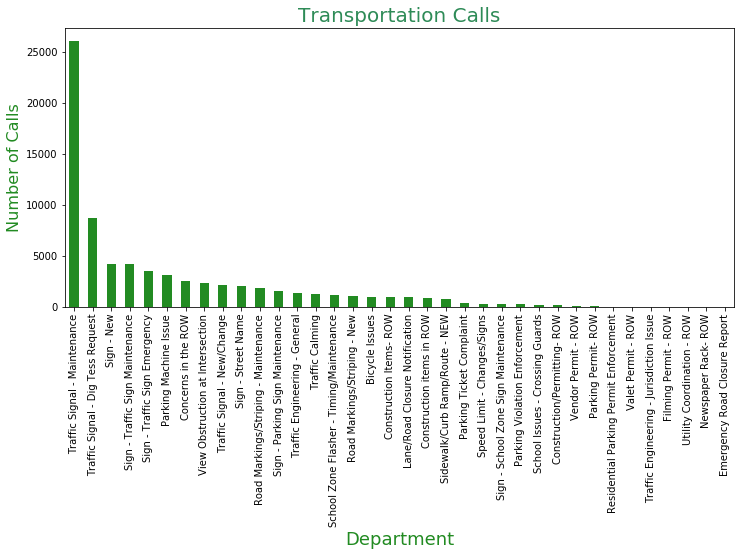

In [66]:
pd.value_counts(transportation['complaint_description']).plot.bar(color = "forestgreen")
# plt.tight_layout()
plt.gcf().subplots_adjust(bottom=0.45)
plt.title('Transportation Calls', fontsize=20, color= "seagreen")
plt.xlabel('Department', fontsize=18, color = "forestgreen")
plt.ylabel('Number of Calls', fontsize=16, color = "forestgreen")
plt.savefig("overviewtransportation.png")
plt.show()

In [40]:
resource_recovery = austin311_df[austin311_df['owning_department'].str.contains('Austin Resource Recovery')]
resource_recovery.head()

,incident_zip,created_date,owning_department,complaint_description,complaint_type,year,month
47,78721,2016-03-13 13:26:48,Austin Resource Recovery,ARR Missed Recycling,SWSRECYC,2016,3
62,78731,2017-06-20 09:13:47,Austin Resource Recovery,ARR Dead Animal Collection,SWSDEADA,2017,6
64,78758,2017-06-15 18:32:01,Austin Resource Recovery,ARR Street Sweeping,SWSSTSWE,2017,6
68,78757,2017-06-29 22:23:20,Austin Resource Recovery,ARR Missed Recycling,SWSRECYC,2017,6
83,78727,2015-06-06 13:41:42,Austin Resource Recovery,ARR Dead Animal Collection,SWSDEADA,2015,6


In [41]:
#resource recovery also needs further cleaning
resource_recovery['complaint_description'] = resource_recovery['complaint_description'].str.replace("Austin Code - ", "")
resource_recovery['complaint_description'] = resource_recovery['complaint_description'].str.replace("ARR ", "")

C:\Users\Administrator\AppData\Local\conda\conda\envs\py36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Administrator\AppData\Local\conda\conda\envs\py36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [42]:
#top number of complaints by zip (> 3000)
resource_recovery.incident_zip.value_counts().reset_index(name="count").query("count > 3000")["index"]

0    78745
1    78704
2    78702
3    78759
4    78748
5    78731
6    78744
Name: index, dtype: int64

In [43]:
# most common types of resource recovery complaints (count over 1000)
topresource_complaints = resource_recovery.complaint_description.value_counts().reset_index(name="count").query("count > 1000")["index"]
print(topresource_complaints)

0                   Missed Recycling
1             Dead Animal Collection
2    Missed Yard Trimmings /Organics
3                     Brush and Bulk
4                    Street Sweeping
5               Request Code Officer
Name: index, dtype: object


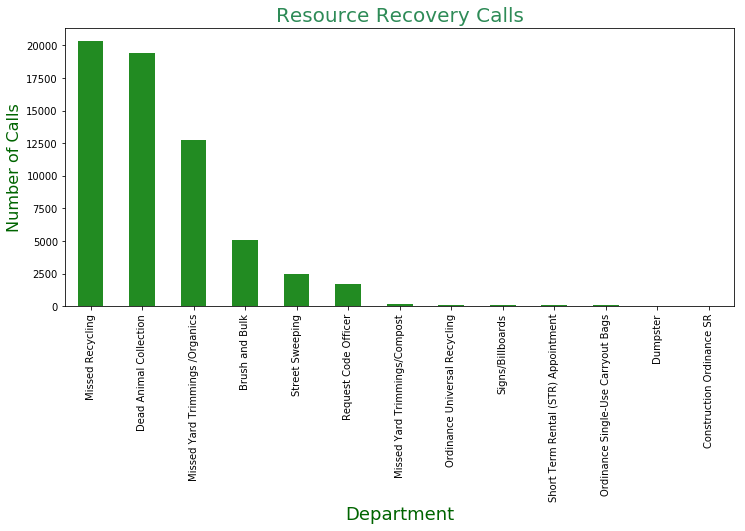

In [67]:
pd.value_counts(resource_recovery['complaint_description']).plot.bar(color = "forestgreen")
# plt.tight_layout()
plt.gcf().subplots_adjust(bottom=0.45)
plt.title('Resource Recovery Calls', fontsize=20, color = "seagreen")
plt.xlabel('Department', fontsize=18, color = "darkgreen")
plt.ylabel('Number of Calls', fontsize=16, color = "darkgreen")
plt.savefig("overviewresourcerecovery.png")
plt.show()

In [45]:
public_works = austin311_df[austin311_df['owning_department'].str.contains('Public Works')]
public_works.head()

,incident_zip,created_date,owning_department,complaint_description,complaint_type,year,month
12,78702,2016-03-09 14:46:45,Public Works,Pavement Failure,SBPAVEFA,2016,3
41,78704,2015-06-03 14:08:48,Public Works,Obstruction in ROW,OBSTMIDB,2015,6
42,78705,2016-10-05 11:53:42,Public Works,Curb/Gutter Repair,SBCURBGU,2016,10
48,78753,2014-02-06 15:53:16,Public Works,Pothole Repair,SBPOTREP,2014,2
57,78704,2016-04-25 16:20:11,Public Works,Tree Issue ROW/Emergency (PW),PRTRROWE,2016,4


In [46]:
#top number of complaints by zip (> 2000)
public_works.incident_zip.value_counts().reset_index(name="count").query("count > 2000")["index"]

0    78745
1    78704
2    78702
3    78703
4    78744
5    78705
Name: index, dtype: int64

In [47]:
# most common types of public works complaints (count over 1000)
topworks_complaints = public_works.complaint_description.value_counts().reset_index(name="count").query("count > 1000")["index"]
print(topworks_complaints)

0                        Pothole Repair
1                      Debris in Street
2                    Obstruction in ROW
3       Tree Issue ROW/Maintenance (PW)
4         Tree Issue ROW/Emergency (PW)
5                       Sidewalk Repair
6                      Pavement Failure
7    Alley & Unpaved Street Maintenance
8                        Mowing Medians
Name: index, dtype: object


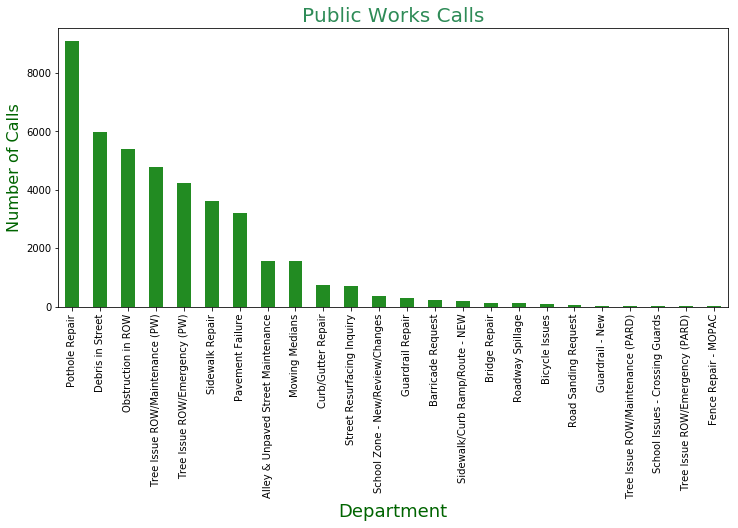

In [68]:
pd.value_counts(public_works['complaint_description']).plot.bar(color = "forestgreen")
plt.gcf().subplots_adjust(bottom=0.45)
# plt.tight_layout()
plt.title('Public Works Calls', fontsize=20, color = "seagreen")
plt.xlabel('Department', fontsize=18, color = "darkgreen")
plt.ylabel('Number of Calls', fontsize=16, color = "darkgreen")
plt.savefig("overviewpublicworks.png")
plt.show()